Task1_0618. auto-mpg 데이터 셋에서 mpg와 weight의 선형 관계를 그래프로 작성하세요.(전체, origin에 따른 관계 2개 작성)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.xlsx to auto-mpg.xlsx


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

auto_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset/auto-mpg.xlsx')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


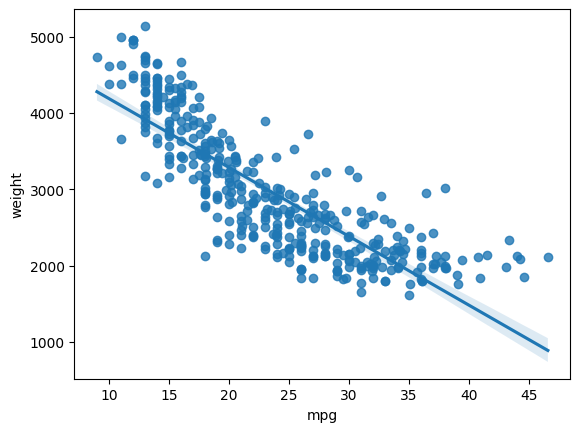

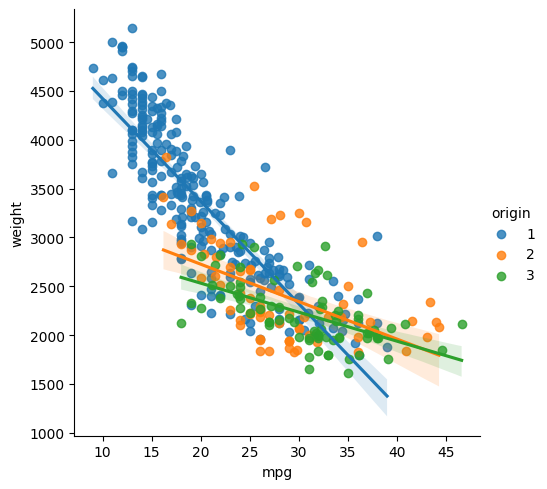

In [2]:
sns.regplot(x='mpg', y='weight', data=auto_df)
plt.show()
sns.lmplot(x='mpg', y='weight', data=auto_df, hue='origin')

1번이 2,3번 보다 더 역의 상관관계에 있다.

시본은 여러 옵션을 줄경우 리포트로 사용하기 좋음

사용하기도 편리, 탐색적 분석뿐 아니라 웹에서도 유용





Task2_0618. pairplot을 생성해서 컬럼간의 관계를 시각화하세요. 단 종에 따라 다른 색상을 사용.

In [4]:
df_pg = sns.load_dataset('penguins')
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df_pg

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
df_pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df_pg2 = df_pg.copy()

In [ ]:
df_pg2['sex'] = df_pg2.sex.replace({'male':1, 'female':0})
df_pg2.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
df_pg2['island'] = df_pg2.island.replace({'Torgersen':0, 'Biscoe': 1, 'Dream':2})
df_pg2['sex'] = df_pg2.sex.replace({'Male':1, 'Female':0})

In [8]:
df_pg2.head()
df_pg2.columns


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

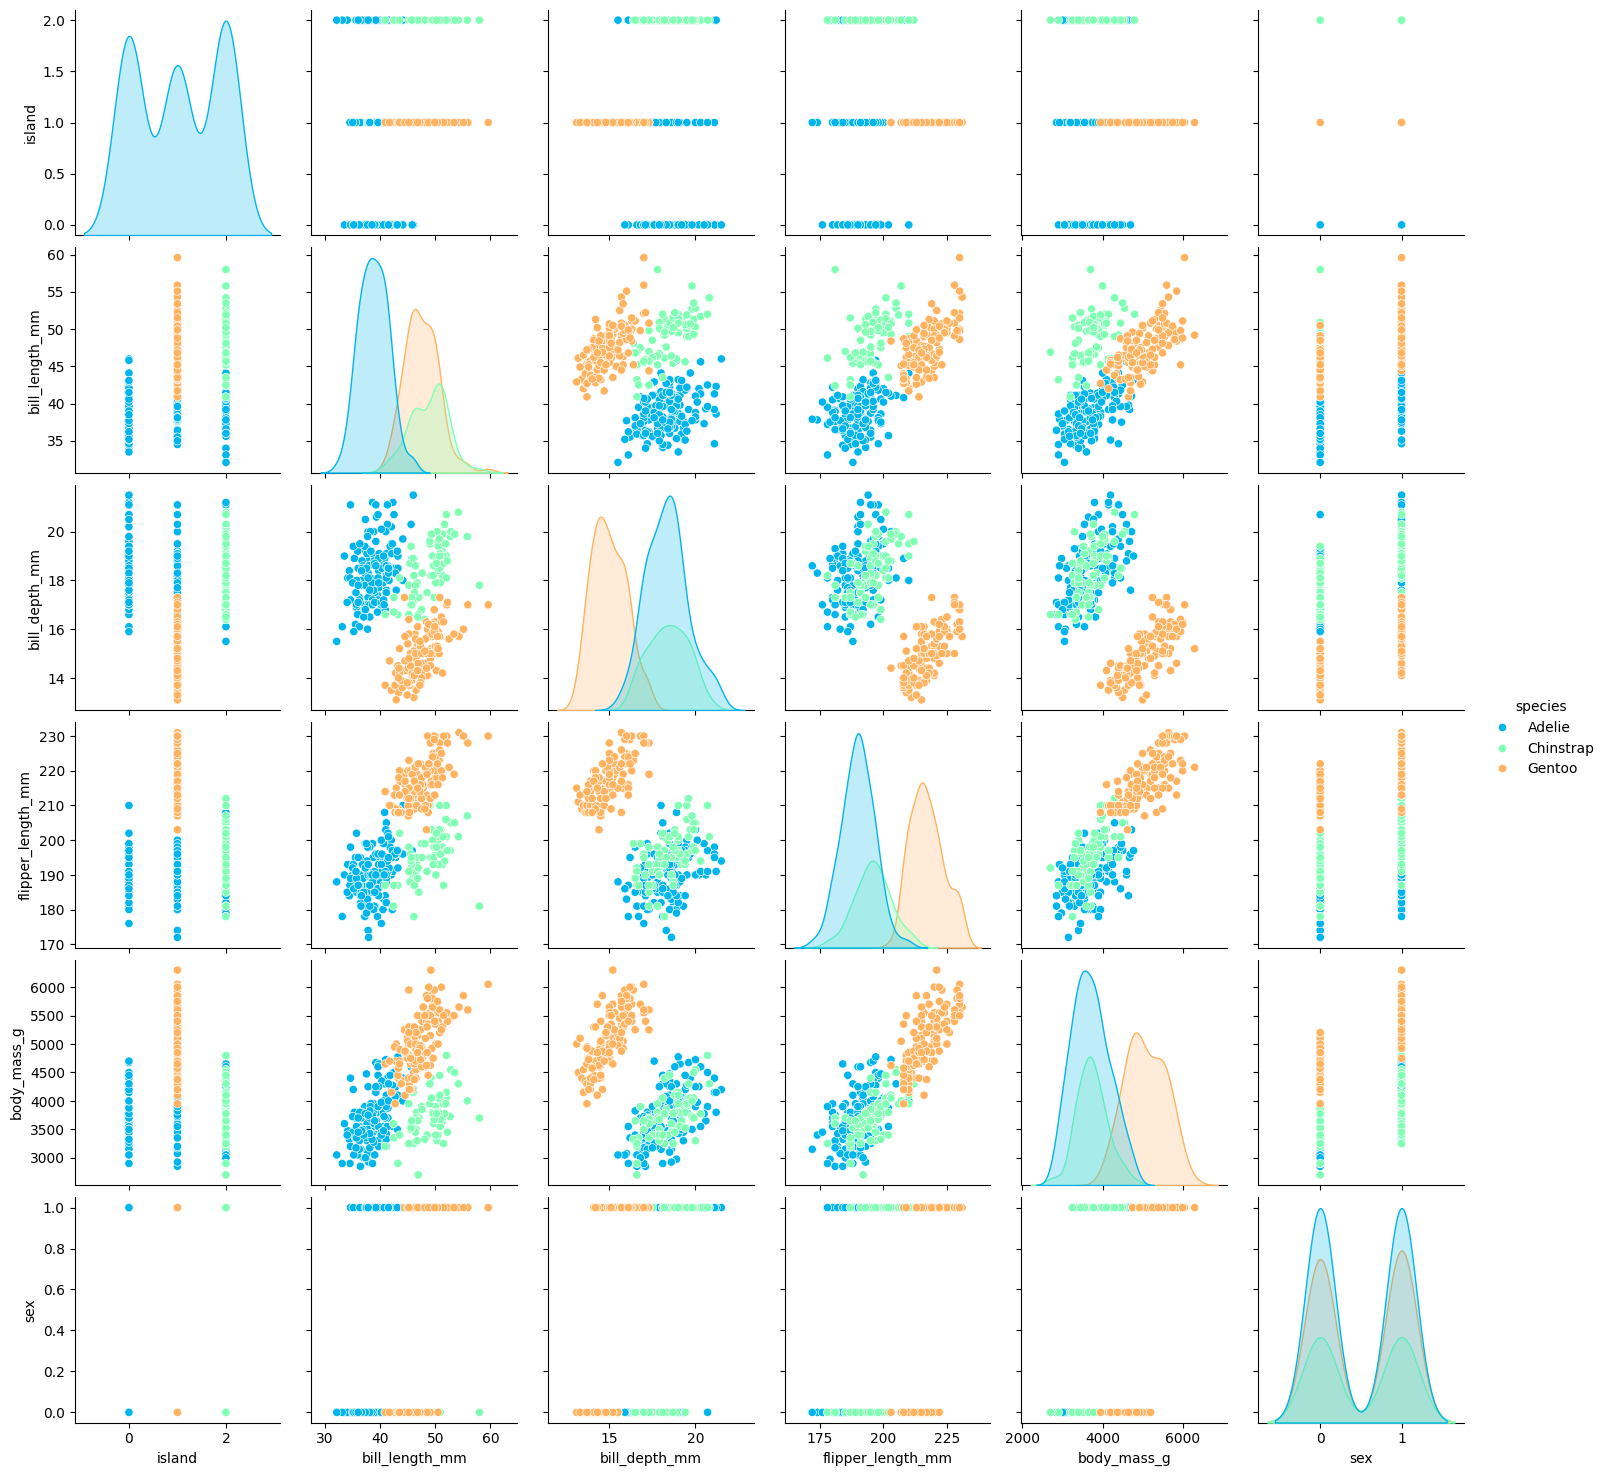

In [ ]:
sns.pairplot(df_pg2, hue='species',palette='rainbow')

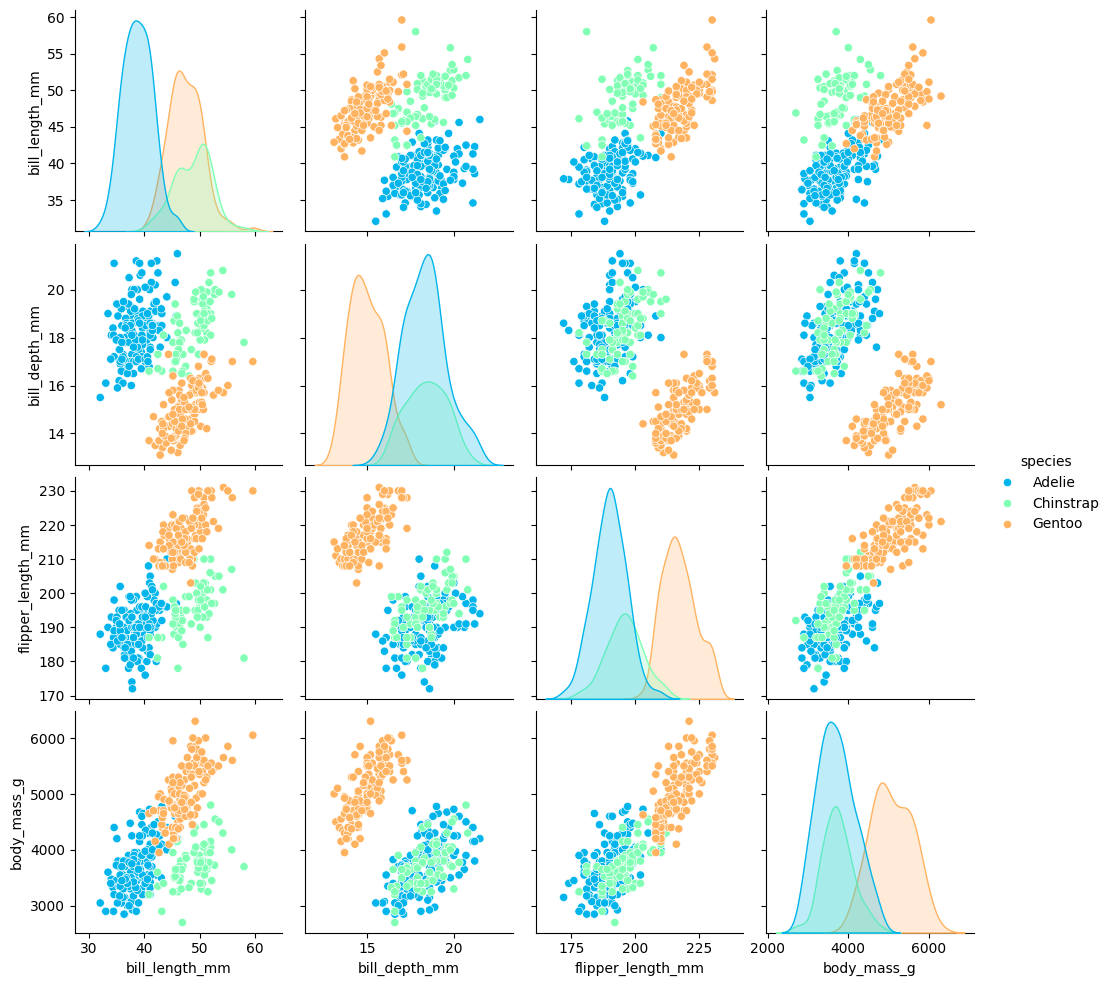

In [ ]:
sns.pairplot(df_pg, hue='species',palette='rainbow')
plt.show()

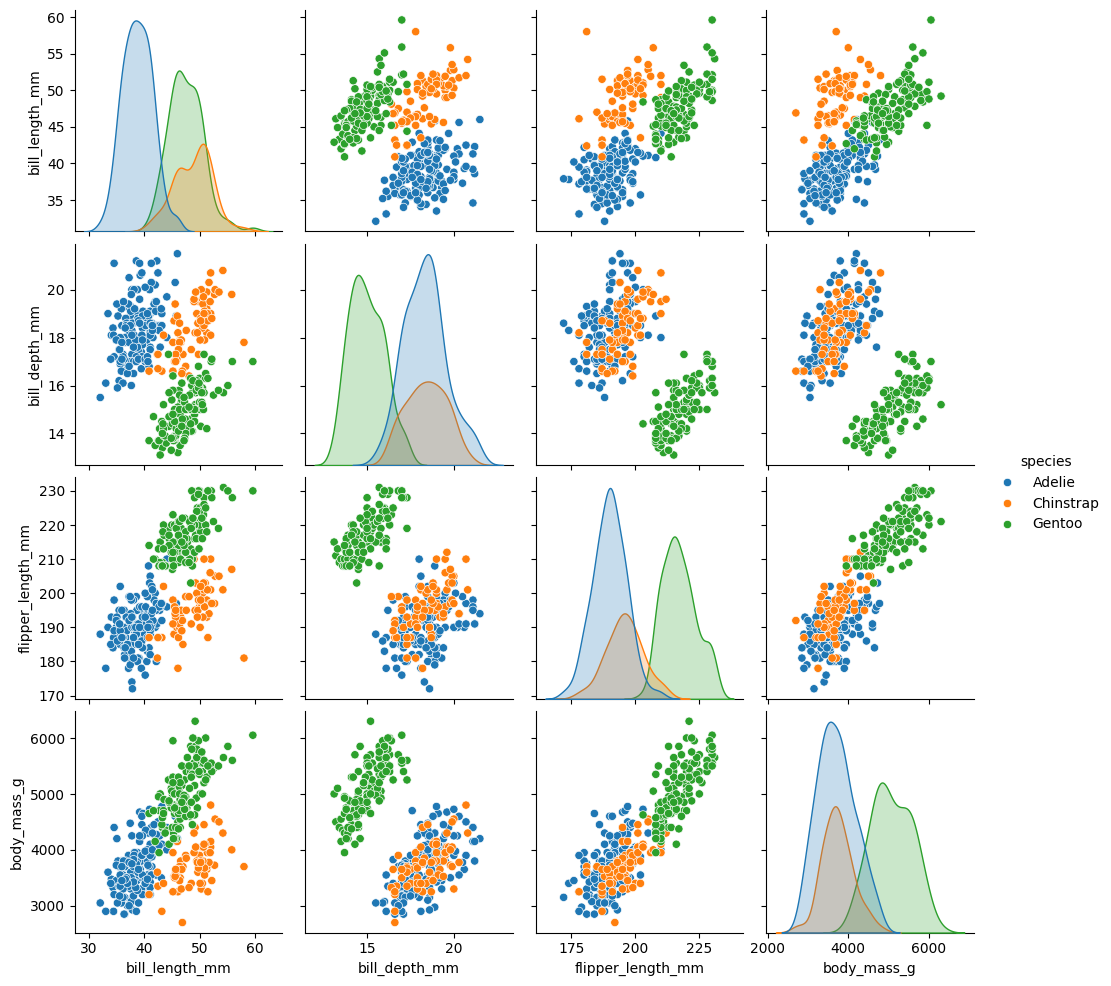

In [ ]:
sns.pairplot(df_pg['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g'], hue="species")

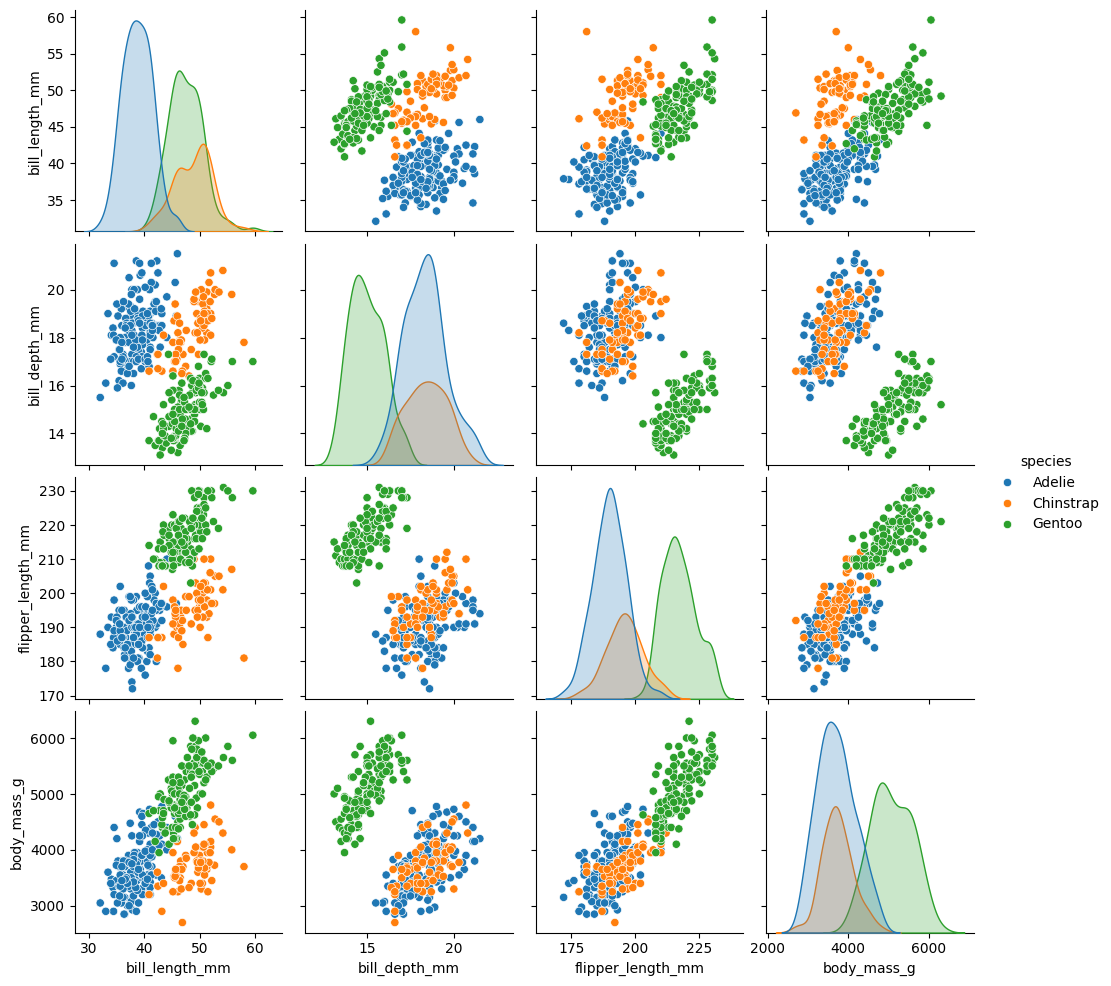

In [10]:
#ex - species 기본에도 들어가고 휴에도 들어가야 나옴
sns.pairplot(df_pg[['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']], hue="species")

[Features]
- species: 펭귄의 종 (Adelie, Chinstrap, Gentoo)
- island: 데이터가 수집된 섬 (Biscoe, Dream, Torgersen)
- bill_length_mm: 부리 길이 (mm)
- bill_depth_mm: 부리 깊이 (mm)
- flipper_length_mm: 지느러미 길이 (mm)
- body_mass_g: 몸무게 (g)
- sex: 성별 (male, female)
- year: 데이터가 수집된 연도

[Species]
- Adelie: 아델리 펭귄
- Chinstrap: 턱끈펭귄
- Gentoo: 젠투펭귄

[수집된 섬]
- Biscoe
- Dream
- Torgersen

컬럼들로 분류모델 적용가능

Task3_0618. 펭귄 데이터셋을 사용하여, 각 종별로 섬(island)별 개체 수를 나타내는 카운트 플롯을 생성하세요. x축은 'island', hue는 'species'로 설정하세요.

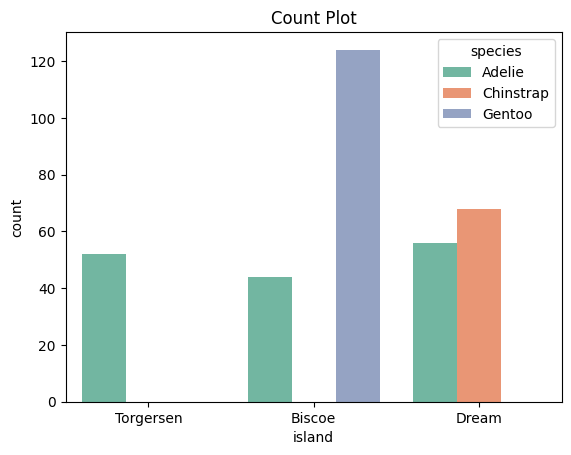

In [12]:
sns.countplot(x='island', data=df_pg, hue='species',palette='Set2')
plt.title('Count Plot')
plt.show()

아델리는 넓게 분포, 다른 펭귄은 서식지 정해짐


Task4_0618. sex와 class간의 생존율을 보여주는 히트맵을 작성하세요.

In [13]:
t_df = sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


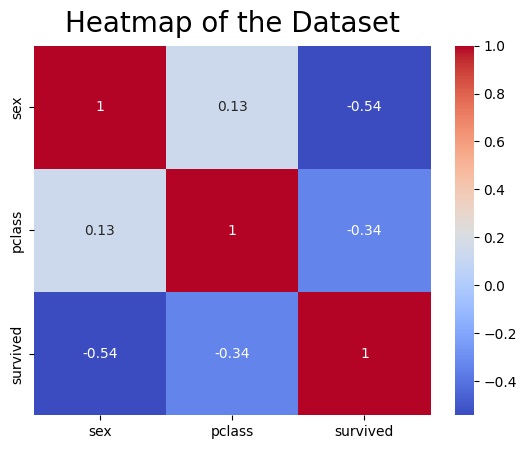

In [14]:
t_df['sex'] = t_df.sex.replace({'male':1, 'female':0})
sns.heatmap(t_df[['sex','pclass', 'survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of the Dataset',size=20, pad=10)
plt.show()

<Axes: xlabel='pclass', ylabel='sex'>

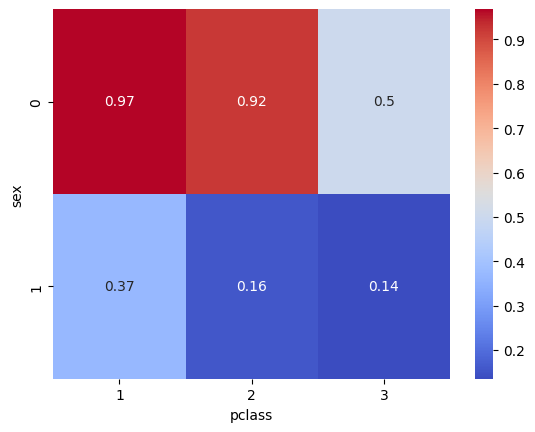

In [15]:
#ex
pivot = pd.pivot_table(t_df, index='sex',
                       columns='pclass',
                       values='survived',
                       aggfunc=(lambda x:x.sum()/x.count()), fill_value=0)
sns.heatmap(pivot, annot=True, cmap='coolwarm')

Task5_0618. 타이타닉 데이터셋을 사용하여, 객실 등급(class)에 따른 탑승객의 나이를 나타내는 박스 플롯과 바이올린 플롯을 같은 그래프 내에서 나란히 생성하세요. 이를 통해 각 클래스별 나이 분포의 차이를 비교하세요.

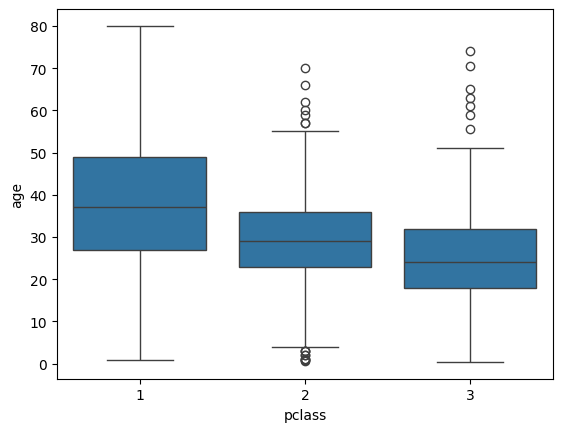

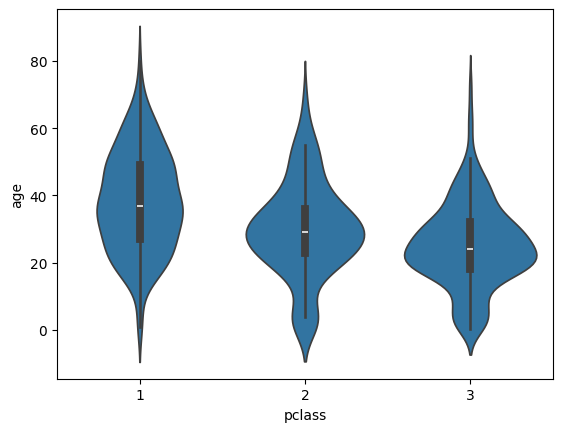

In [ ]:
sns.boxplot(x='pclass', y='age', data=t_df)
plt.show()

sns.violinplot(x='pclass', y='age', data=t_df)
plt.show()

<Axes: xlabel='pclass', ylabel='age'>

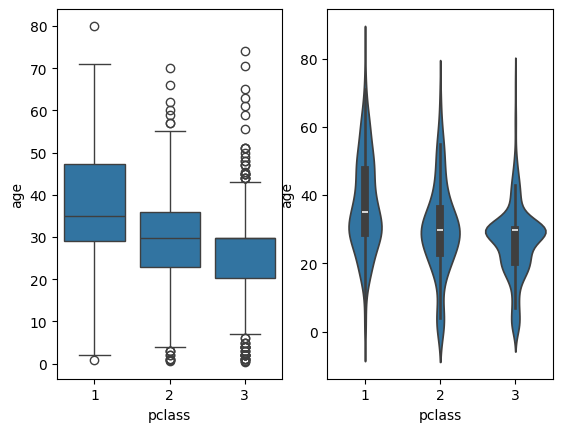

In [17]:
#ex
#subplot
import numpy as np

t_df['age'].replace(np.nan, t_df['age'].mean(), inplace=True)
plt.subplot(1,2,1)
sns.boxplot(x='pclass', y='age', data=t_df)
plt.subplot(1,2,2)
sns.violinplot(x='pclass', y='age', data=t_df)

1번 객실은 나이있는 사람이 많음,

In [25]:
from bs4 import BeautifulSoup

html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a>
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>
</body></html>
"""

Task6_0618. 주어진 HTML 문서에서 모든 $<a>$ 태그를 추출하세요.

In [27]:
soup = BeautifulSoup(html_doc, 'html.parser')
a_tags = soup.find_all('a')
print(type(a_tags))
for i in a_tags:
    print(i)

<class 'bs4.element.ResultSet'>
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>


Task7_0618. 주어진 HTML 문서에서 첫 번째 $<p>$ 태그의 텍스트를 추출하세요.

In [ ]:
soup = BeautifulSoup(html_doc, 'html.parser')
p_tags = soup.find('p')
print(p_tags.text)

The Dormouse's story


In [23]:
#ex
p_tags = soup.find('p')
print(p_tags.get_text())

The Dormouse's story


Task8_0618. 주어진 HTML 문서에서 모든 링크의 URL을 추출하세요.

In [ ]:
soup = BeautifulSoup(html_doc, 'html.parser')
links = soup.find_all('a')
for l in links:
    print(l.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [28]:
#ex - 이방법이 더 간단
for tag in a_tags:
    print(tag['href'])

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


Task9_0618. 주어진 HTML 문서에서 클래스가 sister인 모든 태그를 추출하세요.

In [ ]:
sis_tags = soup.find_all(class_='sister')
for s in sis_tags:
    print(s)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>


예약어 클래스랑 구분하기 위해 언더바 적용해서 추출

Task10_0618. 주어진 HTML 문서에서 ID가 link1인 태그를 추출하세요

In [ ]:
id_link1 = soup.find(id='link1')
print(id_link1)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>


id는 고유해서 한번만 쓰임, 클래스는 여러번 쓰일수있음.
id - find_all 쓸 이유가 없음

Task11_0618. 주어진 HTML 문서에서 모든 텍스트를 추출하세요.

In [ ]:
all_txts = soup.find_all('html')
for i in all_txts:
    print(i.text)

The Dormouse's story

The Dormouse's story
Elsie
Lacie
Tillie



In [29]:
#ex
all_text = soup.get_text()
print(all_text)


The Dormouse's story

The Dormouse's story
Elsie
Lacie
Tillie




Task12_0618. 주어진 HTML 문서에서 href 속성이 http://example.com/lacie인 태그를 추출하세요.

In [ ]:
href_lacie = soup.find(href="http://example.com/lacie")
print(href_lacie)

<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>


Task13_0618. 주어진 HTML 문서에서 ID가 link1인 태그의 부모 태그를 추출하세요.

In [ ]:
id_link1 = soup.find(id='link1')
print(id_link1.parent)

<body>
<p class="title"><b>The Dormouse's story</b></p>
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
</body>


Task14_0618. 주어진 HTML 문서에서 ID가 link1인 태그의 다음 형제 태그를 추출하세요.

In [33]:
id_link1 = soup.find(id='link1')
sibs = id_link1.find_next_siblings()
for i in  sibs:
    print(i)

<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>


In [35]:
#ex - find_next_siblings() 형제 태그 다 나옴
print(id_link1.find_next_sibling())

<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>


In [36]:
# 형제 앞 찾기
print(id_link1.find_previous_sibling())

<p class="title"><b>The Dormouse's story</b></p>


In [37]:
id_link2 = soup.find(id='link2')
print(id_link2.find_previous_sibling())

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>


In [39]:
# <p> 태그와 <a>태그의 부모태그 확인
p_tag = soup.find('p')
a_tag = soup.find('a')
parent_of_p = p_tag.parent.name
parent_of_a = a_tag.parent.name
are_siblings = p_tag.find_next_siblings() == a_tag
print(f'<p>태그의 부모태그: {parent_of_p}')
print(f'<a>태그의 부모태그: {parent_of_a}')
print(f"둘은 형제인가? {'yes' if are_siblings else 'no'}")

<p>태그의 부모태그: body
<a>태그의 부모태그: body
둘은 형제인가? no


In [41]:
# 자식태그확인
p_tag = soup.find('p', class_='title')
print(p_tag)
chidren_of_p = p_tag.children
for i in chidren_of_p:
    print(i.name)

<p class="title"><b>The Dormouse's story</b></p>
b


In [42]:
# 자식태그확인
p_tag = soup.find('p', class_='title')
print(p_tag)
chidren_of_p = p_tag.findChildren()
for i in chidren_of_p:
    print(i.name)

<p class="title"><b>The Dormouse's story</b></p>
b


Task15_0618. 주어진 HTML 문서에서 ID가 link1인 태그의 href 속성 값을 추출하세요.

In [ ]:
id_link1 = soup.find(id='link1')
print(id_link1.get('href'))

http://example.com/elsie


In [43]:
#ex
print(id_link1['href'])

http://example.com/elsie
